# Bengali Notebook

## Import basic libraries and dependencies

In [1]:
import sys
import importlib

sys.path.append('./modules')
from config import English, Bengali

## Set a language

In [2]:
LANG = Bengali # English, Bengali

# 0. Language overview 

Some characteristics of the Bengali language are:

- Native speakers: around 230 million
- Language family: Indo-European > Indo-Iranian > Indo-Aryan > Eastern Zone > Bengali-Assamese > Bengali
- Vocabulary size: 100,000 separate words
- Writing system: 
    + written in [Bengali  alphabet](https://en.wikipedia.org/wiki/Bengali_alphabet), a part of the [Bengali–Assamese script](https://en.wikipedia.org/wiki/Bengali%E2%80%93Assamese_script). It is an [abugida](https://en.wikipedia.org/wiki/Abugida), a segmental writing system in which consonant-vowel sequences are written as units; each unit is based on a consonant letter, and vowel notation is secondary. 
    + Bengali punctuation marks, apart from the downstroke দাড়ি dari (।), the Bengali equivalent of a full stop, have been adopted from western scripts and their usage is similar
- Phonology: 
    + 29 consonants 
    + 7 vowels, as well as 7 nasalised vowels


# 1. Data Preparation


**Assumptions:**
- Two-or-more end-of-line symbols (i.e. '\n\n') signify the separation of two paragraphs.
- Two or more exclamation(!)/interrogation(?)/full stop(।) doesn't follow the grammatical rules; it is 
    most likely used by the writer to emphasize whatever they are saying.
- The end of a sentence is determined by an exclamation (!), an interrogation (?) or a full stop (।)
- The corpus is probably from a web page, since it includes HTML labels
- Presence of text in English

**Operations**: 
- Get a list of paragraphs by splitting the text by at-least-2 consecutive end-of-line characters (i.e. '\n{2,}').
- For each paragraph:
    + Substitute two or more exclamations/interrogations/full stops by a single one
    + Remove HTML tags
    + Remove text in English  
    + Split text in sentences using the [bltk library](https://github.com/saimoncse19/bltk)
- Collect all sentences from all paragraphs as a list.

In [3]:
# import libraries and dependencies
import preprocessing
import utils
importlib.reload(preprocessing)
from preprocessing import raw_preprocess, split_train_test

## 1.1. Preprocess data for sentencepiece

In [4]:
# preprocess raw data to get a list of sentences.
sentences = raw_preprocess(LANG)

# write the sentences into a file, each sentence on one line.
with open(f'data/{LANG.name}/preprocessed.txt', 'w') as f:
    for sentence in sentences:
        f.write(f'{sentence}\n')

utils.print_length_statistics(sentences)

Num. of sentences = 11717
Avg. length = 113.63471878467185
Std. dev. of the length = 152.39452707784676
Maximum length = 2316
Minimum length = 1


## 1.2. Train/test split

In [8]:
# split data to train and test.
train, test = split_train_test(sentences, LANG)

# write train and test data into corresponding files.
train_path = f'data/{LANG.name}/train.txt'
test_path = f'data/{LANG.name}/test.txt'

with open(train_path, 'w') as f:
    f.write('\n'.join(train))
with open(test_path, 'w') as f:
    f.write('\n'.join(test))

# 2. Subword segmentation

In this section, we work on 3 segmentation models with difference vocabulary sizes. The first one employs character-level segmentation, which is simply to treat each character as a token, resulting in a vocabulary size of 55. In the rest of this section, we focus mostly on the other 2 models.

## 2.1. Experiments with vocabulary sizes


There are 2 types of subword: small vocabulary size (i.e. usually from 100 to 800) and large vocabulary size (i.e. from 1500 to 3000). For each type, we do some experiments to choose an exact vocabulary size, which will be fixed for subsequent tasks.

**Approach**

We use the same principle used with the English corpus to select the optimal vocabulary sizes: [Minimum Description Length (MDL)](https://en.wikipedia.org/wiki/Minimum_description_length).


a. Small vocabulary 

For small vocabulary sizes (from 100 to 800), the corresponding description length (or total file size) is shown in the figure below. Increasing the vocabulary size decreases the description length, being 800 the optimal vocabulary size within this range.

![figures/bn/task2.3_small_vocab_file_size.png](figures/bn/task2.3_small_vocab_file_size.png)

We examine the different segmentations of an example sentence to try to understand how the models behave for the Bengali language: 

original text: 

> তোবে এভাবে তার দিকে ধেয়ে যাওয়া কখনো কাম্য নয়।


> Tōbē ēbhābē tāra dikē dhēẏē yā'ōẏā kakhanō kāmya naẏa.


>However, it is never desirable to rush towards him like this.

vocab_size = 100: 
> ▁ত ো বে ▁এ ভ া বে ▁ত ার ▁দ ি কে ▁ ধ ে য়ে ▁য া ও য়া ▁ক খ ন ো ▁ক া ম ্য ▁ন য় ।

> ▁Ta ̔ō bē ▁ē bha ̔ā bē ▁ta ̔āra ▁da ̔i kē ▁ dha ̔ē ẏē ▁ya ̔ā ō ẏā ▁ka kha na ̔ō ▁ka ̔ā ma ya ▁na ẏa.

vocab_size = 300: 
> ▁তো বে ▁এ ভ াবে ▁তার ▁দি কে ▁ধ েয়ে ▁যা ওয়া ▁ক খন ো ▁কা ম ্য ▁ন য় ।

> ▁Tō bē ▁ē bha ̔ābē ▁tāra ▁di kē ▁dha ̔ēẏē ▁yā ōẏā ▁ka khana ̔ō ▁kā ma ya ▁na ẏa.

vocab_size = 500: 
> ▁তো বে ▁এ ভাবে ▁তার ▁দি কে ▁ধ েয়ে ▁যা ওয়া ▁ক খন ো ▁কা ম ্য ▁নয় ।

> ▁Tō bē ▁ē bhābē ▁tāra ▁di kē ▁dha ̔ēẏē ▁yā ōẏā ▁ka khana ̔ō ▁kā ma ya ▁naẏa.


vocab_size = 800:

> ▁তো বে ▁এ ভাবে ▁তার ▁দি কে ▁ধ েয়ে ▁যা ওয়া ▁কখন ো ▁কা ম ্য ▁নয় ।

> ▁Tō bē ▁ē bhābē ▁tāra ▁di kē ▁dha ̔ēẏē ▁yā ōẏā ▁kakhana ̔ō ▁kā ma ya ▁naẏa.
 
b. Large vocabulary

For large vocabulary sizes (from 1500 to 3000), we repeat the procedure. The description lengths corresponding to different sizes are shown below.

![figures/bn/task2.3_large_vocab_file_size.png](figures/bn/task2.3_large_vocab_file_size.png)

The minimal description length is obtained for the vocabulary size 1700.

Regarding the above example, choosing a vocabulary size of 1700 gives the following result:

original text: 

>তোবে এভাবে তার দিকে ধেয়ে যাওয়া কখনো কাম্য নয়।

> Tōbē ēbhābē tāra dikē dhēẏē yā'ōẏā kakhanō kāmya naẏa.

>However, it is never desirable to rush towards him like this.

vocab_size = 1700:

>▁তো বে ▁এভাবে ▁তার ▁দিকে ▁ধ েয়ে ▁যা ওয়া ▁কখনো ▁কাম ্য ▁নয় ।

> ▁Tō bē ▁ēbhābē ▁tāra ▁dikē ▁dha ̔ēẏē ▁yā ōẏā ▁kakhanō ▁kāma ya ▁naẏa.


## 2.2. Training of Segmentation models

**Operations**:
- We train 3 segmentation models of different vocabulary sizes:
    - character-level segmentation.
    - small subword vocabulary size of 800.
    - large subword vocabulary size of 1700.
- For each vocabulary size, we:
    - train a segmentation model.
    - apply the model on the training data to get an encoded text.
    - decode the encoded text, verify that the decoded text is the same as the original training data to ensure the correctness of the model.
    - apply the same encoding, decoding operations on the test data.    



In [13]:
# import libraries and dependencies
import segmentation
importlib.reload(segmentation)
from segmentation import train_segmentation, encode_text_file, decode_text_file
from config import seg_profiles

In [4]:
seg_profiles[LANG.name]

[SegmentationConf(id='s1', vocab_size=None, model_type='char'),
 SegmentationConf(id='s2', vocab_size=800, model_type='bpe'),
 SegmentationConf(id='s3', vocab_size=1700, model_type='bpe')]

In [ ]:
for seg in seg_profiles[LANG.name]:
    # train segmentation on the train data
    spm1 = train_segmentation(
        text_file=train_path, 
        LANG=LANG, 
        vocab_size=seg.vocab_size, 
        model_type=seg.model_type)
  
    encoded_file = f'data/{LANG.name}/segmentation/{seg.id}.txt'
    encode_text_file(text_file=train_path, model_path=spm1, output_file=encoded_file)
    
    decoded_file = f'data/{LANG.name}/segmentation/{seg.id}_decoded.txt'
    decode_text_file(text_file=encoded_file, model_path=spm1, output_file=decoded_file)
    
    # test it on the test data
    encoded_file = f'data/{LANG.name}/segmentation/{seg.id}_test.txt'
    encode_text_file(text_file=test_path, model_path=spm1, output_file=encoded_file)
    
    decoded_file = f'data/{LANG.name}/segmentation/{seg.id}_decoded_test.txt'
    decode_text_file(text_file=encoded_file, model_path=spm1, output_file=decoded_file)

# 3. Language Model

## 3.1. Baseline

In [12]:
from config import baseline_conf
baseline_conf

TrainingConf(hidden=40, rand_seed=1, debug=2, bptt=4, n_class=9999)

Executing the following cell will delete the already trained language models. To simply see the perplexity of the trained models, skip this cell and execute the next one.

In [ ]:
for seg in seg_profiles[LANG.name]:
    # Hyper parameters
    hidden = baseline_conf.hidden
    rand_seed = baseline_conf.rand_seed
    debug = baseline_conf.debug
    bptt = baseline_conf.bptt
    n_class = baseline_conf.n_class

    # Parameters
    model_path = f'models/rnnlm/{LANG.name}/{seg.id}_baseline'
    train_path = f'../../../../data/{LANG.name}/segmentation/{seg.id}.txt'
    valid_path = f'../../../../data/{LANG.name}/segmentation/{seg.id}_test.txt'

    # run the model 
    !rm -rf $model_path \
      && mkdir $model_path \
      && cd $model_path \
      && ../../../../rnnlm-0.3e/rnnlm \
        -train $train_path \
        -valid $valid_path \
        -rnnlm model \
        -hidden $hidden \
        -rand-seed $rand_seed \
        -debug $debug \
        -bptt $bptt \
        -class $n_class

The validation perplexities of the baseline models are:

In [13]:
for seg in seg_profiles[LANG.name]:
    model_path = f'models/rnnlm/{LANG.name}/{seg.id}_baseline'
        
    # read output and print perplexity
    with open(f'{model_path}/model.output.txt', 'r') as f:
        output = f.read()
        pp = output.split()[-1]
        print(f'Baseline {LANG.name}-{seg.id} validation perplexity: {pp}')

Baseline bn-s1 validation perplexity: 7.368929
Baseline bn-s2 validation perplexity: 94.109742
Baseline bn-s3 validation perplexity: 176.930043


## 3.2. Experiments

We take into account the results of the grid search of the hyperparameters `hidden`, `bptt` and `class` for the English models to avoid a grid search for Bengali (it take much longer time to do experiments on the Bengali corpus). We choose the following values for the three Bengali models (`s1`, `s2` and `s3`): 

- `hidden=200`: we learned that the more neurons in the hidden layer, the lower the perplexity. We select again the maximum number of hidden neurons recommended by the authors of the [rnnlm toolkit](http://www.fit.vutbr.cz/~imikolov/rnnlm/FAQ.txt).

- `bptt=4`: we learned that modifying the number of backpropagation steps doesn't affect the perplexity of the model much, so we keep this hyperparameter fixed (with the same value as in the baseline configuration).

- `class=1700`: we select a number of classes equal to the optimal vocabulary size, i.e. 1700.

In [15]:
import pickle
import itertools

In [16]:
# experimented results are kept in a file
grid_result_file = f'experiments/{LANG.name}/task3_grid_search.pickle'
# grid_results stores the results in memory
grid_results = {}

# import previous results if exists

with open(grid_result_file, 'rb') as f:
    previous_results = pickle.load(f)
    grid_results.update(previous_results)

**Results**:

The optimal configurations of hyperparameters for each vocabulary size are:

In [17]:
for seg in seg_profiles[LANG.name]:
    results = dict((k, v) for (k, v) in grid_results.items() if k[1] == seg.id)
    print(f"{seg.id}: {min(results, key=results.get)}")

s1: ('bn', 's1', 200, 4, 1700)
s2: ('bn', 's2', 200, 4, 1700)
s3: ('bn', 's3', 200, 4, 1700)


In [ ]:
# train and save LMs for the optimal configurations
importlib.reload(config)
from config import optimal_conf

for id, (hidden, rand_seed, debug, bptt, n_class) in \
    enumerate(optimal_conf[LANG.name], start=1):
    
    seg_id = f's{id}'

    # paths
    model_path = f'models/rnnlm/{LANG.name}/{seg_id}_optimal'
    train_path = f'../../../../data/{LANG.name}/segmentation/{seg_id}.txt'
    valid_path = f'../../../../data/{LANG.name}/segmentation/{seg_id}_test.txt'

    # run the model 
    !rm -rf $model_path \
      && mkdir $model_path \
      && cd $model_path \
      && ../../../../rnnlm-0.3e/rnnlm \
        -train $train_path \
        -valid $valid_path \
        -rnnlm model \
        -hidden $hidden \
        -rand-seed $rand_seed \
        -debug $debug \
        -bptt $bptt \
        -class $n_class

# 4. Text Generation

We generate texts of different lengths for each of the 6 language models (3 baseline and 3 optimal models) from section 3. The generated texts are then decoded by the corresponding segmentation models. We translate the texts from Bengali to English using [Google Translator](https://translate.google.com/) to gain some understanding of the content of the generated texts. Of course, when Google Translator, we must take into account that it has the ability to auto-correct word and grammar errors, giving better results in English than the original results in Bengali. Next, we compare the artificial texts of length 100: 


In [5]:
from config import SEG_MODELS_PATH

## 4.1. Baseline models

In [6]:
for seg in seg_profiles[LANG.name]:
    gen_folder = f'data/{LANG.name}/generation/{seg.id}_baseline'
    # path to LM file
    language_model_file = f'models/rnnlm/{LANG.name}/{seg.id}_baseline/model'
    # path to segmentation file
    if seg.model_type == 'char':
        seg_model_file = f'{SEG_MODELS_PATH}/{LANG.name}/spm_{seg.model_type}.model'
    else:
        seg_model_file = f'{SEG_MODELS_PATH}/{LANG.name}/spm_{seg.model_type}_vocabsize-{seg.vocab_size}.model'
    
    # remove the text-generation folder
    !rm -rf $gen_folder \
        && mkdir $gen_folder
    
    for n_gen in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
        # generate text using rnnlm
        gen_file = f'{gen_folder}/{n_gen}.txt'
        !rnnlm-0.3e/rnnlm \
                -rnnlm $language_model_file \
                -gen $n_gen \
                -debug 0 \
            > $gen_file
        
        # decode generated text using sentencepiece
        decoded_gen_file = f'{gen_folder}/{n_gen}_decoded.txt'
        decode_text_file(gen_file, seg_model_file, decoded_gen_file)

`s1`:
> টারা হচুন না অনশালে দিস আর করা শক্যোথা নাই জদিও আজতে দ্বকি তাইসবিল অপরতো তুই থেকে কোন অনেক ক্রকা রু

> Tara hachun na anshale dis aar kara shakyotha nai jadio aajte dbki taisbil aparato tui to ko kanai kroka ru

`s2`:
> সাকিব নেওয়ামী ভাষাও প্রথম না তাকে সাংবাদিক নেয়ত !
যে সাদাত করে দেন কিছু হোক।
অশনকজনীতি ছাড়া কাকে চিত্রোন নবীতে পারেছে খুব মজা পাইলে খুদানি পাপন সাহেব অনেক ধন্যবাদ কেন?
আন্দতেল আমি।
তাকিয়ে দেখলাম।
এই লোককেও বলছিলো চিনিতে মারছি, রইলব ইবিবা

> Shakib Newami language was not the first to take him as a journalist!
Whatever you make sadat.
If you have a lot of fun in Chitron Nabi without Ashanakaniti, why is Mr. Khudani Papon thank you so much?
Andtel I.
I looked.
This guy was also saying I was hitting with sugar, Raylab Ibiba

`s3`:
> সাকিবলাও কেন ছিলসাকিব মোমো হুজুর ।
রাজনীতি হুজুর এবং বুয়ে গেলোও আর বাঁচার কৃজলায় ডগলো করা দরকার আছে আল্লাহর মজারিদের আছাদ মুদের কাছে যদিবাসী লোদা বলবে উনি ওগানজিথা।
বাংলার চরিত্র নিয়ে দেকবো তার সিলেজের চুল কেউ মনে হয় আর রিস্টে বোমনি এটাতো নারীর ষনীতি করে ভিডিও টা দেখছেন এক জনন আবার চোরশালা এ জানতে নিয়

>Why was Shakibala also Shakib Momo sir.
Politics, sir and brother-in-law, but it is necessary to dodge the misery of survival, if the people of Loda say that he is Oganjitha.
I will look at the character of Bengal, I think the hair of his silage is someone, and in the wrist, Bomni is watching the video of a woman being sexually assaulted.

Once again, it can be seen that the three text have different lengths with `s1` < `s2` < `s3`, which is coherent with the vocabulary that each model uses.

Regarding the quality of the generated texts, we can only comment on the automatic translations given by Google Translator. Within the baseline models, the bigger the vocabulary, the better the generated text: `s3` provides the results. The text generated by `s1` cannot even be translated to English. The text generated by `s2` can be translated, but the generated sentences are not gramatically correct and don't have any sense. For `s3`, even though the sentences still do not have much sense, they are more elaborated and grammatically correct. Even if Google Translator is correcting grammar errors, we can assume that it does it equally for every text and, thus, if the translation of the text generated by `s3` is better regarding grammar, the original text in Bengali will be better too.

## 4.2. Tuned models

In [41]:
for seg in seg_profiles[LANG.name]:
    gen_folder = f'data/{LANG.name}/generation/{seg.id}'
    # path to LM file
    language_model_file = f'models/rnnlm/{LANG.name}/{seg.id}_optimal/model'
    # path to segmentation file
    if seg.model_type == 'char':
        seg_model_file = f'{SEG_MODELS_PATH}/{LANG.name}/spm_{seg.model_type}.model'
    else:
        seg_model_file = f'{SEG_MODELS_PATH}/{LANG.name}/spm_{seg.model_type}_vocabsize-{seg.vocab_size}.model'
    
    # remove the text-generation folder
    !rm -rf $gen_folder \
        && mkdir $gen_folder
    
    for n_gen in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
        # generate text using rnnlm
        gen_file = f'{gen_folder}/{n_gen}.txt'
        !rnnlm-0.3e/rnnlm \
                -rnnlm $language_model_file \
                -gen $n_gen \
                -debug 0 \
            > $gen_file
        
        # decode generated text using sentencepiece
        decoded_gen_file = f'{gen_folder}/{n_gen}_decoded.txt'
        decode_text_file(gen_file, seg_model_file, decoded_gen_file)


`s1`:
>“ভিডিও থেকে একটি গল্প্রান্ধু হয়।
খানকিকুত্তার বাচ্চাহাজিয়ে যত্তকে বাস্তব যত দিন আসে সব কত বড় যু

>“There is a story-teller from the video.
How big is all the real days when the bitch's baby hajiye yatake real


`s2`:
>ভাইয়া আজ আবার ও  আসুনুটে যতখন এক খালেদায়েক,
তিন পোড়ুন খেলা চিতবেতার বোদায় হায়রে বিপক্ষা, বাংলার দফাড়াতের ভুদির ছি শালা তোর বাগি নাস্তিক ভন্ড কুত্তার বাচ্চা আবাল বাঁকিয়ে তুই ইউটিউব লাথালী ও ছোট বেলা থেকে যেতে হয়তো এই রকম বং্গালের সনয়তি কে ধরে নিয়ে যাচ্ছে

> Brother, come again today and as long as one Khaledayek,
Alas for the three-burned game Chitbetar Boda, Alas for the opposition


`s3`:
> সিনেমা টা ভালো করে সেইভাবে একটু টাইমে নাই ওয়ামত ও নাচেগেছে মিডিয়াতে লাখ টাকা কাওয়া কাদের বা সারা মোটাফ্যাপি তোমাকেন,,,আরতেই ঘুষখোরটা সাজল শি কি খায় আর মেয়েটার সাবস্ক্রাইব করছে একডিয়া আর দিন গ্রেপ্তন করলাম সবাই কিন পৃথিবীতে কত বড় আছে আমি বাংলাদেশের কত দিতে গিয়ে।
আজ আমার মনে ছিলো না এখানে ডেল করে!
যে খারাপ সালা

> The movie is not doing well like that. Wamat and Nachegeche are dancing in the media for lakhs of rupees. Kawa Kader or Sara Motafapi Tomaken.
I didn't think Dale was here today!
That bad sala


In general, the quality of the generated texts seems to be of the same quality. This constrasts with the poorer results that the model `s1` for English gave. Each symbol of the Bengali language denotes a consonant followed by a particular vowel that is implicit; there are explicit vowels too. The way in which the Bengali writing systems works, allows the model `s1` to have enough context using simply the vocabulary corresponds with the alphabet.
 
There doesn't seem to be a significant improvement with respect to the baselines of `s2` and `s3`.


# 5. OOV comparison

In this section, we compare the OOV rate of the original vocabulary and the augmented vocabularies from generated texts.

In [5]:
import vocab_processing 
vocab_processing = importlib.reload(vocab_processing)
from vocab_processing import get_word_level_vocabulary, get_word_level_tokens, get_oov_rate

In [6]:
train_path = f'data/{LANG.name}/train.txt'
test_path = f'data/{LANG.name}/test.txt'

In [7]:
# get the training vocabulary on word-level
train_vocab = get_word_level_vocabulary(LANG, train_path)
# get the test tokens on word-level
test_tokens = get_word_level_tokens(LANG, test_path)
# compute and print OOV rate
oov_rate = get_oov_rate(train_vocab, test_tokens)
print(f'Original data\'s OOV rate: {oov_rate:.2%}')

Original data's OOV rate: 13.76%


### Baseline models

In [10]:
oov_rates = []

for seg in seg_profiles[LANG.name]:
    gen_folder = f'data/{LANG.name}/generation/{seg.id}_baseline'
    oov_rates.append([])
    
    for n_gen in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:

        # obtain the vocabulary from the generated corpora
        decoded_gen_file = f'{gen_folder}/{n_gen}_decoded.txt'
        gen_vocab = get_word_level_vocabulary(LANG, decoded_gen_file)

        # compute the oov-rate on the augmented vocabulary
        augmented_oov_rate = get_oov_rate(train_vocab | gen_vocab, test_tokens)
        print(f'(Baseline) {LANG.name} {seg.id} {n_gen} OOV rate: {augmented_oov_rate:.2%}')
        oov_rates[-1].append(augmented_oov_rate)

(Baseline) bn s1 10 OOV rate: 13.76%
(Baseline) bn s1 100 OOV rate: 13.76%
(Baseline) bn s1 1000 OOV rate: 13.76%
(Baseline) bn s1 10000 OOV rate: 13.74%
(Baseline) bn s1 100000 OOV rate: 13.59%
(Baseline) bn s1 1000000 OOV rate: 13.06%
(Baseline) bn s1 10000000 OOV rate: 11.89%
(Baseline) bn s2 10 OOV rate: 13.76%
(Baseline) bn s2 100 OOV rate: 13.76%
(Baseline) bn s2 1000 OOV rate: 13.76%
(Baseline) bn s2 10000 OOV rate: 13.73%
(Baseline) bn s2 100000 OOV rate: 13.46%
(Baseline) bn s2 1000000 OOV rate: 12.44%
(Baseline) bn s2 10000000 OOV rate: 10.56%
(Baseline) bn s3 10 OOV rate: 13.76%
(Baseline) bn s3 100 OOV rate: 13.76%
(Baseline) bn s3 1000 OOV rate: 13.76%
(Baseline) bn s3 10000 OOV rate: 13.72%
(Baseline) bn s3 100000 OOV rate: 13.43%
(Baseline) bn s3 1000000 OOV rate: 12.24%
(Baseline) bn s3 10000000 OOV rate: 10.28%


### Tuned models

In [11]:
for seg in seg_profiles[LANG.name]:
    gen_folder = f'data/{LANG.name}/generation/{seg.id}'
    oov_rates.append([])
    
    for n_gen in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:

        # obtain the vocabulary from the generated corpora
        decoded_gen_file = f'{gen_folder}/{n_gen}_decoded.txt'
        gen_vocab = get_word_level_vocabulary(LANG, decoded_gen_file)

        # compute the oov-rate on the augmented vocabulary
        augmented_oov_rate = get_oov_rate(train_vocab | gen_vocab, test_tokens)
        print(f'(Tuned) {LANG.name} {seg.id} {n_gen} OOV rate: {augmented_oov_rate:.2%}')
        oov_rates[-1].append(augmented_oov_rate)

(Tuned) bn s1 10 OOV rate: 13.76%
(Tuned) bn s1 100 OOV rate: 13.76%
(Tuned) bn s1 1000 OOV rate: 13.76%
(Tuned) bn s1 10000 OOV rate: 13.74%
(Tuned) bn s1 100000 OOV rate: 13.62%
(Tuned) bn s1 1000000 OOV rate: 12.88%
(Tuned) bn s1 10000000 OOV rate: 11.14%
(Tuned) bn s2 10 OOV rate: 13.76%
(Tuned) bn s2 100 OOV rate: 13.76%
(Tuned) bn s2 1000 OOV rate: 13.76%
(Tuned) bn s2 10000 OOV rate: 13.73%
(Tuned) bn s2 100000 OOV rate: 13.47%
(Tuned) bn s2 1000000 OOV rate: 12.37%
(Tuned) bn s2 10000000 OOV rate: 10.35%
(Tuned) bn s3 10 OOV rate: 13.76%
(Tuned) bn s3 100 OOV rate: 13.76%
(Tuned) bn s3 1000 OOV rate: 13.76%
(Tuned) bn s3 10000 OOV rate: 13.74%
(Tuned) bn s3 100000 OOV rate: 13.46%
(Tuned) bn s3 1000000 OOV rate: 12.30%
(Tuned) bn s3 10000000 OOV rate: 10.17%


The original OOV rate for the Bengali language is 13.07%. Augmenting the vocabulary with RNNLM's generated texts can effectively reduce this number, as shown in the below table and figure:

| model\ gen. size | $10^1$ | $10^2$ | $10^3$ | $10^4$ | $10^5$ | $10^6$ | $10^7$ |
|------------------|--------|--------|--------|--------|--------|--------|--------|
| s1 baseline      | 13.76% | 13.76% | 13.76% | 13.74% | 13.59% | 13.06% | 11.89% |
| s2 baseline      | 13.76% | 13.76% | 13.76% | 13.73% | 13.46% | 12.44% | 10.56% |
| s3 baseline      | 13.76% | 13.76% | 13.76% | 13.72% | 13.43% | 12.24% | 10.28% |
|||||||||
| s1 optimal       | 13.76% | 13.76% | 13.76% | 13.74% | 13.62% | 12.88% | 11.14% |
| s2 optimal       | 13.76% | 13.76% | 13.76% | 13.73% | 13.47% | 12.37% | 10.35% |
| s3 optimal       | 13.76% | 13.76% | 13.76% | 13.74% | 13.46% | 12.30% | 10.17% |


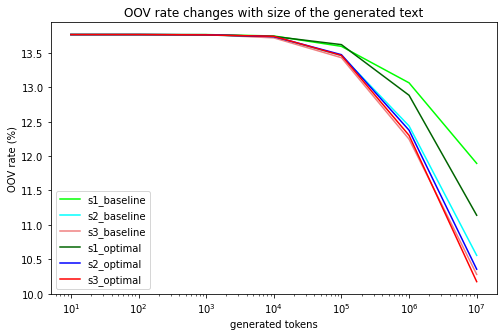

In [12]:
import visualisation
importlib.reload(visualisation)
from visualisation import plot_oov_rates
from config import FIGURES_PATH

plot_oov_rates(oov_rates, save_path=f'{FIGURES_PATH}/{LANG.name}/task5_oov_rates.png')

### Observations

+ The OOV-rate starts to decrease only when  $10^4$ tokens have been generated to extend the vocabulary. From $10^5$ to $10^7$, the decrease in the OOV-rate is more notiaceable, with a reduction of more than 3% with $10^7$ for the `s2` and `s3` models.

+ Among the different models, we see that both `s1` are clearly worse. `s2` and `s3` are nearly identical, but `s3` achieves a OOV-rate slightly lower.

+ For the three vocabulary sizes (`s1`, `s2` and `s3`) the optimal model achieves a slower OOV-rate for $10^7$, but the improvement for `s2` and `s3` is minimal.


# 6. Analysis

The aim we have been trying to achieve with this project is obtaining the best language model of English and the best language model of Bengali possible for different vocabulary sizes, reducing their Out-of-vocabulary (oov) rate as much as possible with respect to the given  baseline models. In this sense, our objective has been achieved: using perplexity to tune the hyperparameters, we have obtained models whose generated texts reduce the OOV rate more than the corresponding baseline.

There are clear differences between the results of English and Bengali. First, we see a difference in the optimal vocabulary size: 500 for English versus the 1700 for Bengali. We believe this difference can be attributed to the fact that Bengali is a morphologically much more richer language, having a higher number of different sub-words. 

A second obvious difference between the English and Bengali languages resides in the OOV rates: while the English language has a OOV rate of 4.80% over the original train data, the Bengali language has an OOV rate of 13.76%. This difference in the OOV rates can be also attributed to the greater morphological richness of the Bengali language. This higher original OOV rate leaves more place for improvement when augmenting the original data, and the OOV rate of the Bengali models decreases ca. 3%, compare to the decrease of ca. 1.5% for the English models. 

A third difference regards the improvement of the tuned models with respect to the baselines.  For Bengali, the reduction in OOV rates of the tuned models compared to the baseline models is smaller than in the English models. One reason that explains this might be the fact that we don't properly tune the hyperparameters for the Bengali models with a grid search, but only infer them from our observations from English models.

As explained along the two notebooks, in order to optimise the OOV rates, we have used the Minimum Description Length (MDL) criteria to determine the optimal vocabulary sizes and we have used the perplexity over the validation set to select the best hyperparameters of the RNN language models. Regarding the hyperparameters of the RNNLMs, we have obtained the following conclusions from the grid search that we conducted for the English language models: 


- The more neurons in the hidden layer, the lower the perplexity. 

- Modifying the number of backpropagation steps doesn't have a major impact on the perplexity.

- Selecting the number of classes (`class` hyperparameter) to the vocabulary size seems to be the best.


Having tuned the hyperparaters of the English models by selecting those which minimized the perplexity of the validation set, we wonder if we could obtain better results if we took into account *Occam's razor*. Even though the selected hyperparameter configurations for the English models are those that give the lowest perplexity, it can been seen that other configurations provid similar perplexities and lead to less complex models i.e. less hidden neurons, less back-propagation steps and less classes. Also in relation to the tuning of hyperparameters, having conducted a grid search for the Bengali models might lead to better models. 

The results could also be improved by using more and varied training data, as well as trying different model architectures (e.g. transformer, SVM).


